In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    BatchNormalization,
    Dense, Dropout, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# =====================================================
# LOAD PREPROCESSED FEATURES (FROM TASK 8)
# =====================================================

X = np.load("X_mel.npy")      # (N, 128, 128, 1)
y = np.load("y_labels.npy")  # (N,)

print("Loaded data:")
print("X shape:", X.shape)
print("y shape:", y.shape)

num_classes = len(np.unique(y))
input_shape = X.shape[1:]


Loaded data:
X shape: (6705, 128, 128, 1)
y shape: (6705,)


In [10]:
# =====================================================
# TRAIN / VALIDATION SPLIT
# =====================================================

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [11]:
# =====================================================
# ================== SINGLE-LABEL TRAINING =============
# =====================================================

print("\nStarting SINGLE-LABEL training...")

# One-hot encoding
y_train_sl = to_categorical(y_train, num_classes)
y_val_sl = to_categorical(y_val, num_classes)

# -------- CNN Model (Single Label) --------
single_label_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])

single_label_model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

single_label_model.summary()

history_sl = single_label_model.fit(
    X_train, y_train_sl,
    validation_data=(X_val, y_val_sl),
    epochs=20,
    batch_size=32
)


Starting SINGLE-LABEL training...


C:\Users\Srish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,179 (24.87 MB)

 Trainable params: 6,518,731 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 109s 609ms/step - accuracy: 0.1512 - loss: 2.6073 - val_accuracy: 0.0582 - val_loss: 11.9685
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 139s 593ms/step - accuracy: 0.1676 - loss: 2.2835 - val_accuracy: 0.1305 - val_loss: 2.8081
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 135s 549ms/step - accuracy: 0.1780 - loss: 2.2671 - val_accuracy: 0.2073 - val_loss: 2.2428
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 78s 464ms/step - accuracy: 0.1928 - loss: 2.1979 - val_accuracy: 0.2573 - val_loss: 2.1311
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 476ms/step - accuracy: 0.2424 - loss: 2.1155 - val_accuracy: 0.3565 - val_loss: 1.9106
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 81s 473ms/step - accuracy: 0.2899 - loss: 1.9853 - val_accuracy: 0.3967 - val_loss: 1.8192
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 482ms/step - accuracy: 0.3128 - loss: 1.9058 - val_accuracy: 0.4295 - val_loss: 1.7814
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 89s 526ms/step - accuracy: 0.3440 - los

In [12]:
# Save model
single_label_model.save("single_label_cnn.h5")

In [13]:
# =====================================================
# ================= MULTI-LABEL TRAINING ==============
# =====================================================

print("\nStarting MULTI-LABEL training (simulated)...")

# -------- Create pseudo multi-label targets --------
# NOTE: IRMAS is single-label, so we simulate multi-label data

np.random.seed(42)
y_multilabel = np.zeros((len(y), num_classes))

for i, label in enumerate(y):
    y_multilabel[i, label] = 1
    # Randomly add another instrument (simulation)
    if np.random.rand() > 0.7:
        random_label = np.random.randint(0, num_classes)
        y_multilabel[i, random_label] = 1

X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(
    X, y_multilabel,
    test_size=0.2,
    random_state=42
)



Starting MULTI-LABEL training (simulated)...


In [17]:
# -------- CNN Model (Multi Label) --------
multi_label_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="sigmoid")
])

multi_label_model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

multi_label_model.summary()

history_ml = multi_label_model.fit(
    X_train_ml, y_train_ml,
    validation_data=(X_val_ml, y_val_ml),
    epochs=10,
    batch_size=32
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,179 (24.87 MB)

 Trainable params: 6,518,731 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 469ms/step - accuracy: 0.1365 - loss: 0.4951 - val_accuracy: 0.0850 - val_loss: 5.1573
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 94s 557ms/step - accuracy: 0.1715 - loss: 0.3981 - val_accuracy: 0.1439 - val_loss: 0.5060
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 135s 513ms/step - accuracy: 0.2030 - loss: 0.3819 - val_accuracy: 0.2878 - val_loss: 0.3362
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 157s 602ms/step - accuracy: 0.2420 - loss: 0.3695 - val_accuracy: 0.3207 - val_loss: 0.3230
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 460ms/step - accuracy: 0.2649 - loss: 0.3575 - val_accuracy: 0.3348 - val_loss: 0.3187
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 85s 507ms/step - accuracy: 0.2908 - loss: 0.3428 - val_accuracy: 0.3572 - val_loss: 0.3156
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 132s 448ms/step - accuracy: 0.3328 - loss: 0.3306 - val_accuracy: 0.3639 - val_loss: 0.3087
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 80s 439ms/step - accuracy: 0.3548 - loss

In [18]:
# Save model
multi_label_model.save("multi_label_cnn.h5")

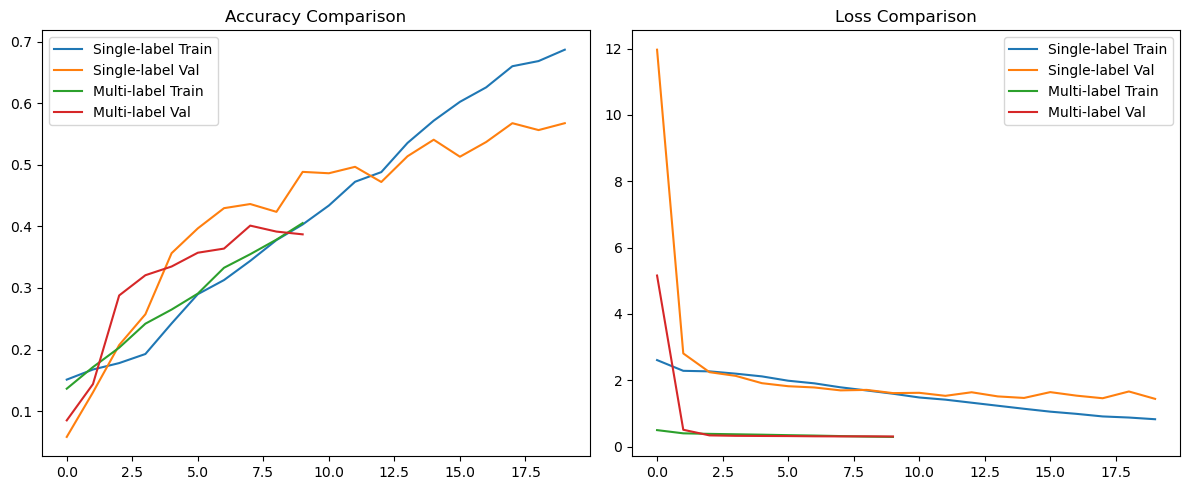


Training completed.
Models saved:
- single_label_cnn.h5
- multi_label_cnn.h5


In [19]:
# =====================================================
# ================= TRAINING CURVES ===================
# =====================================================

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_sl.history["accuracy"], label="Single-label Train")
plt.plot(history_sl.history["val_accuracy"], label="Single-label Val")
plt.plot(history_ml.history["accuracy"], label="Multi-label Train")
plt.plot(history_ml.history["val_accuracy"], label="Multi-label Val")
plt.title("Accuracy Comparison")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_sl.history["loss"], label="Single-label Train")
plt.plot(history_sl.history["val_loss"], label="Single-label Val")
plt.plot(history_ml.history["loss"], label="Multi-label Train")
plt.plot(history_ml.history["val_loss"], label="Multi-label Val")
plt.title("Loss Comparison")
plt.legend()

plt.tight_layout()
plt.show()

print("\nTraining completed.")
print("Models saved:")
print("- single_label_cnn.h5")
print("- multi_label_cnn.h5")